# Visualizes Politeness Dataset

### Imports and Loads

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor


In [3]:
data = pd.read_csv("data/politeness_data.csv", 
                   converters={'all_politeness_scores': pd.eval, 
                               'tokenized_text': pd.eval})

In [4]:
data['doc_len'] = [len(data['tokenized_text'][i]) for i in range(len(data))]

In [6]:
fil_data = data[data['doc_len']<=76].reset_index().drop(columns=["index"])

In [8]:
fil_data.to_csv("data/politeness_data.csv", index=False)

## Visualization

### Document Size

In [50]:
lens = [len(data.tokenized_text[i]) for i in range(len(data.tokenized_text))]

In [61]:
np.percentile(lens, 99)

75.45000000000073

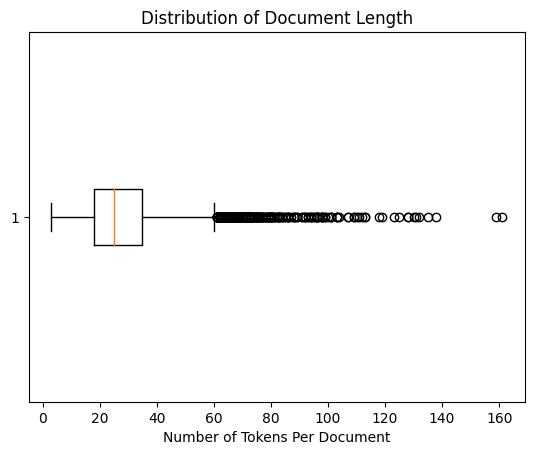

[<matplotlib.lines.Line2D object at 0x15c8c9fa0>, <matplotlib.lines.Line2D object at 0x15c8d7280>]


In [65]:
boxplot = plt.boxplot(lens, vert=False)
plt.title("Distribution of Document Length")
plt.xlabel("Number of Tokens Per Document")
plt.show()

In [68]:
[item.get_xdata() for item in boxplot['whiskers']]

[array([18.,  3.]), array([35., 60.])]

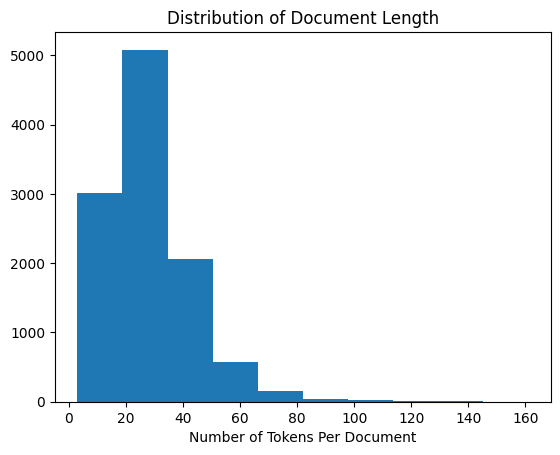

In [55]:
ax = plt.hist(lens)
plt.title("Distribution of Document Length")
plt.xlabel("Number of Tokens Per Document")
plt.show()

In [69]:
max(lens)

161